In [2]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# text & NLP  
import re  
import nltk  
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer  
  
# feature extraction & modeling  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.base import clone
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline  
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.utils import resample 
  
# classifiers  
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.naive_bayes import MultinomialNB  
from xgboost import XGBClassifier  
from scipy.sparse import hstack 
  
# imbalance  
from imblearn.over_sampling import SMOTE  
nltk.download('punkt')  
nltk.download('stopwords')  
nltk.download('wordnet') 
nltk.download('omw-1.4')
nltk.download('punkt_tab')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error

import joblib

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## Step 1: Importing and Cleaning of The Data Set

In [3]:
# Importing Dataset 
product_reviews = pd.read_csv('/Users/mhaider1/Downloads/Data Science/Gen AI/CAPSTONE/sample30.csv')
product_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
product_reviews.shape

(30000, 15)

In [6]:
# Removing columns reviews_userCity , reviews_userProvince columns as they have very leass data and significance
# Removing column reviews_didPurchase column as it has very little values 
# Removing column manufacturer as brand is almost same as manufacturer
# Dropping id column as it is not useful for analysis
product_reviews.drop(columns=['id', 'reviews_userCity', 'reviews_userProvince', 'manufacturer', 'reviews_didPurchase'], inplace=True)

In [7]:
product_reviews = product_reviews.drop_duplicates(subset=['reviews_username', 'name', 'reviews_rating','user_sentiment','reviews_text'], keep='first')
# Converting reviews_rating to numeric type
product_reviews['reviews_rating'] = pd.to_numeric(product_reviews['reviews_rating'], errors='coerce')

In [8]:
product_reviews.shape

(28206, 10)

In [9]:
# Combining categories, Review text and Review title columns in one
product_reviews['reviews_text'] = product_reviews[['categories', 'reviews_title', 'reviews_text']].astype(str).apply(lambda x: x.str.cat(sep='. ', na_rep=''), axis=1)
product_reviews.drop(columns=['reviews_title','categories'], inplace=True)

In [10]:
product_reviews.isna().sum()[product_reviews.isna().sum() > 0]

reviews_date             46
reviews_doRecommend    2130
reviews_username         60
user_sentiment            1
dtype: int64

In [11]:
# Removing rows with null values as they are very less in the dataset
product_reviews.dropna(subset=['reviews_username','reviews_doRecommend','user_sentiment'], inplace=True)

In [12]:
product_reviews.isna().sum()[product_reviews.isna().sum() > 0]

Series([], dtype: int64)

In [13]:
product_reviews.shape

(26041, 8)

In [14]:
product_reviews.columns

Index(['brand', 'name', 'reviews_date', 'reviews_doRecommend',
       'reviews_rating', 'reviews_text', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [15]:
# converting user_sentiment to 0 and 1
product_reviews['user_sentiment']= product_reviews['user_sentiment'].map({'Positive':1,'Negative':0})

In [16]:
# Converting reviews_doRecommend to 0 and 1
product_reviews['reviews_doRecommend']= product_reviews['reviews_doRecommend'].map({True:1,False:0})

product_reviews.reviews_doRecommend.value_counts()

reviews_doRecommend
1    24524
0     1517
Name: count, dtype: int64

In [17]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26041 entries, 3 to 29999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   brand                26041 non-null  object
 1   name                 26041 non-null  object
 2   reviews_date         26041 non-null  object
 3   reviews_doRecommend  26041 non-null  int64 
 4   reviews_rating       26041 non-null  int64 
 5   reviews_text         26041 non-null  object
 6   reviews_username     26041 non-null  object
 7   user_sentiment       26041 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.8+ MB


In [18]:
# Checking reviews Date Column
product_reviews[product_reviews['reviews_date']==' hooks slide or swivel into any desired position."']

,brand,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment
28421,Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,hooks slide or swivel into any desired positi...,1,3,"Kitchen & Dining,Kitchen Storage & Organizatio...",hatestandinginlines,1
28422,Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,hooks slide or swivel into any desired positi...,1,5,"Kitchen & Dining,Kitchen Storage & Organizatio...",karenh2008,1
28423,Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,hooks slide or swivel into any desired positi...,1,5,"Kitchen & Dining,Kitchen Storage & Organizatio...",hellodanielle,1
28424,Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,hooks slide or swivel into any desired positi...,1,5,"Kitchen & Dining,Kitchen Storage & Organizatio...",laurel,1
28425,Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,hooks slide or swivel into any desired positi...,1,5,"Kitchen & Dining,Kitchen Storage & Organizatio...",janet,1
28426,Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,hooks slide or swivel into any desired positi...,1,5,"Kitchen & Dining,Kitchen Storage & Organizatio...",cookinmama2002,1
28427,Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,hooks slide or swivel into any desired positi...,1,5,"Kitchen & Dining,Kitchen Storage & Organizatio...",projectbound,1
28428,Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,hooks slide or swivel into any desired positi...,1,5,"Kitchen & Dining,Kitchen Storage & Organizatio...",chomie,1


In [19]:
# Removing these 8 row
product_reviews = product_reviews[product_reviews['reviews_date']!=' hooks slide or swivel into any desired position."']
product_reviews.shape

(26033, 8)

In [20]:
# Modifying Product Reviews_date column to actual date time
product_reviews['reviews_date'] = pd.to_datetime(product_reviews['reviews_date'])  

In [21]:
# Converting Reviews Date Column to just Month of the year as month is the only relevant factor in this component and talks about seasonal behaviour of the user
product_reviews['reviews_month'] = product_reviews['reviews_date'].dt.month
product_reviews.drop(columns=['reviews_date'], inplace=True)

In [22]:
product_reviews.head()

,brand,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment,reviews_month
3,K-Y,K-Y Love Sensuality Pleasure Gel,0,1,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",rebecca,0,1
4,K-Y,K-Y Love Sensuality Pleasure Gel,0,1,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",walker557,0,12
5,K-Y,K-Y Love Sensuality Pleasure Gel,0,1,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",samantha,0,4
6,K-Y,K-Y Love Sensuality Pleasure Gel,0,1,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",raeanne,0,2
7,K-Y,K-Y Love Sensuality Pleasure Gel,0,1,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",kimmie,0,2


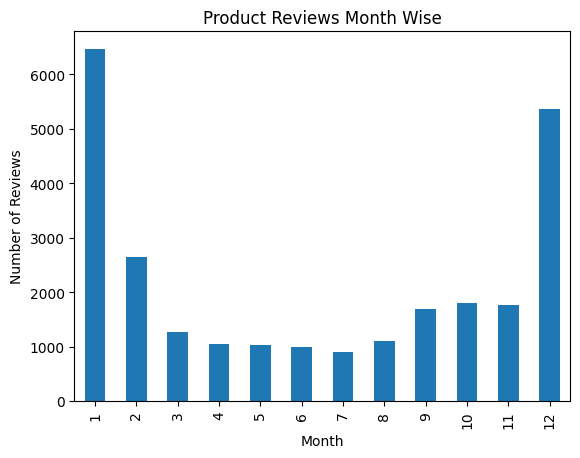

In [23]:
#Lotting Year Wise Review Records
product_reviews['reviews_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Product Reviews Month Wise')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

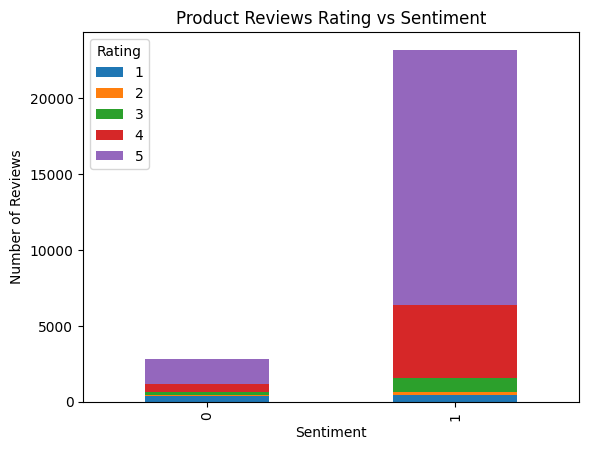

In [24]:
# Comparing Reviews Rating with Sentiment in the dataset
product_reviews.groupby(['user_sentiment','reviews_rating']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Product Reviews Rating vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.legend(title='Rating')
plt.show()

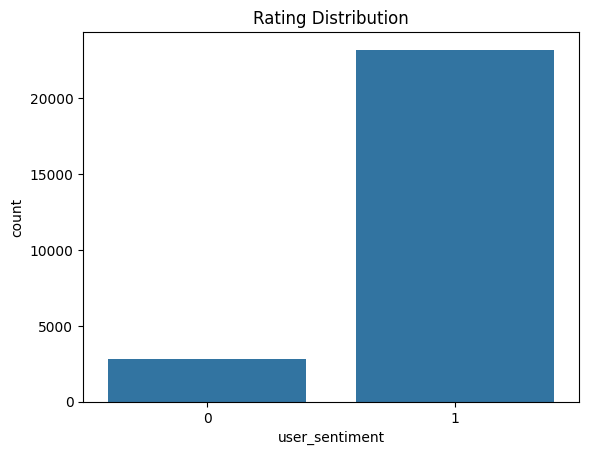

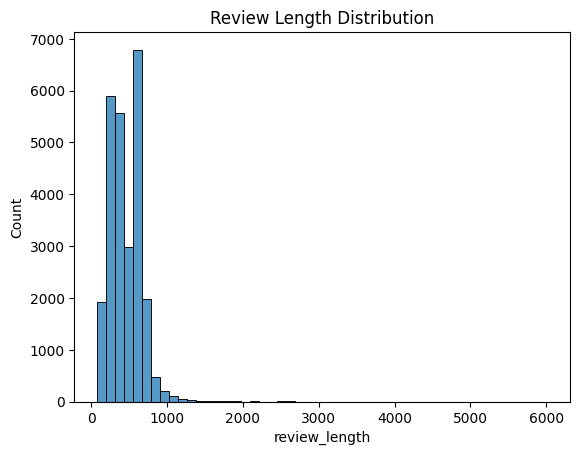

In [25]:

# Checking Distribution of ratings across the reviews
sns.countplot(x='user_sentiment', data=product_reviews)
plt.title('Rating Distribution')
plt.show()

# Review length distribution
product_reviews['review_length'] = product_reviews['reviews_text'].apply(len)
sns.histplot(product_reviews['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.show()

## Step 2: Text cleaning & preprocessing

In [26]:
# Creating function for pre processing of text

stop_words = set(stopwords.words('english'))  
lemmatizer = WordNetLemmatizer()  
  
def preprocess(text):  
    text = text.lower()  
    text = re.sub(r'<.*?>',' ', text)                # remove HTML  
    text = re.sub(r'[^a-z ]',' ', text)              # keep letters only  
    text = re.sub(r'[^a-z0-9\s]', '', text)          # remove punctuation and special chars  
    tokens = nltk.word_tokenize(text)  
    tokens = [t for t in tokens if t not in stop_words and len(t)>1]  
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  
    return ' '.join(tokens) 

In [27]:
# Pre Processing the text in reviews_text columns
product_reviews['clean_review'] = product_reviews['reviews_text'].astype(str).apply(preprocess)

In [27]:
product_reviews.head()

,brand,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment,reviews_month,review_length,clean_review
3,K-Y,K-Y Love Sensuality Pleasure Gel,0,1,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",rebecca,0,1,797,personal care medicine cabinet lubricant sperm...
4,K-Y,K-Y Love Sensuality Pleasure Gel,0,1,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",walker557,0,12,231,personal care medicine cabinet lubricant sperm...
5,K-Y,K-Y Love Sensuality Pleasure Gel,0,1,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",samantha,0,4,378,personal care medicine cabinet lubricant sperm...
6,K-Y,K-Y Love Sensuality Pleasure Gel,0,1,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",raeanne,0,2,350,personal care medicine cabinet lubricant sperm...
7,K-Y,K-Y Love Sensuality Pleasure Gel,0,1,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",kimmie,0,2,343,personal care medicine cabinet lubricant sperm...


In [28]:
# Creating new Dataframe from relevant columns of product reviews dataframe
product_reviews_clean = product_reviews[['brand', 'reviews_doRecommend',
       'reviews_rating', 'user_sentiment',
       'reviews_month', 'review_length', 'clean_review']]
product_reviews_clean.head()

,brand,reviews_doRecommend,reviews_rating,user_sentiment,reviews_month,review_length,clean_review
3,K-Y,0,1,0,1,797,personal care medicine cabinet lubricant sperm...
4,K-Y,0,1,0,12,231,personal care medicine cabinet lubricant sperm...
5,K-Y,0,1,0,4,378,personal care medicine cabinet lubricant sperm...
6,K-Y,0,1,0,2,350,personal care medicine cabinet lubricant sperm...
7,K-Y,0,1,0,2,343,personal care medicine cabinet lubricant sperm...


In [29]:
#Checking user sentiment values
product_reviews_clean['user_sentiment'].value_counts()

user_sentiment
1    23204
0     2829
Name: count, dtype: int64

## Step 3: Feature Extraction

In [30]:
# Extracting features from clean_review column
vect = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
text_features = vect.fit_transform(product_reviews_clean['clean_review']).toarray()

In [31]:
cat_cols= ['brand', 'reviews_doRecommend', 'reviews_rating', 'reviews_month']
cat = pd.get_dummies(product_reviews_clean[cat_cols], drop_first=True)  
num_cols= ['review_length']
num = product_reviews_clean[num_cols].copy()
# Scale numerical features  
scaler = StandardScaler()  
num_scaled = scaler.fit_transform(num)

In [32]:
# Concatenate all features: text (as sparse), numeric, categorical (as dense)  
# Convert dense matrices to sparse for hstack compatibility  
cat_sparse = np.array(cat) 
# Combine all features (text, numerics, categorical)  
X = np.hstack([text_features, num_scaled, cat_sparse])  
y = product_reviews_clean['user_sentiment']  

## Step 4: Train Test Split

In [33]:
# Splitting the train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [34]:
# Checking class balance
print('Train set class distribution:\n', y_train.value_counts(normalize=True)) 
print('Test set class distribution:\n', y_test.value_counts(normalize=True))

Train set class distribution:
 user_sentiment
1    0.891338
0    0.108662
Name: proportion, dtype: float64
Test set class distribution:
 user_sentiment
1    0.8913
0    0.1087
Name: proportion, dtype: float64


In [35]:
# Handling class imbalance using SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=42, k_neighbors=5) 
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)
y_train_resampled.value_counts()

/Users/mhaider1/Library/Python/3.12/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


user_sentiment
1    18563
0    18563
Name: count, dtype: int64

## Step 5: Model Training

#### Model 1: Logistic Regression

In [36]:
# Hyperparameter tuning using GridSearchCV  and model traing and handling class imbalance
lr = LogisticRegression(max_iter=1000,random_state=42,solver='liblinear')  
param_grid_lr = {'C': [0.01, 0.1, 1, 5, 10]}  
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy',n_jobs=-1)
# Fit the model  
grid_lr.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 5, 10]},
             scoring='accuracy')

In [37]:
# Predict and evaluate  
y_pred_lr = grid_lr.predict(X_test)  
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))  
print("Logistic Regression Best Params:", grid_lr.best_params_)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8930286153255234
Logistic Regression Best Params: {'C': 10}
              precision    recall  f1-score   support

           0       0.51      0.75      0.60       566
           1       0.97      0.91      0.94      4641

    accuracy                           0.89      5207
   macro avg       0.74      0.83      0.77      5207
weighted avg       0.92      0.89      0.90      5207



#### Model 2: Random Forest Classifier

In [38]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)  
param_grid_rf = {'n_estimators': [100, 200],  
                 'max_depth': [None, 10, 20]}  
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy',n_jobs=-1)
# Fit the model  
grid_rf.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [39]:
# Predict and evaluate  
y_pred_rf = grid_rf.predict(X_test)  
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))  
print("Random Forest Best Params:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8774726329940464
Random Forest Best Params: {'max_depth': None, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.41      0.30      0.34       566
           1       0.92      0.95      0.93      4641

    accuracy                           0.88      5207
   macro avg       0.66      0.62      0.64      5207
weighted avg       0.86      0.88      0.87      5207



#### Model 3: XG Boost Classifier

In [40]:
# Defining XGB Boost Model Parameters
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
# Hyperparameter tuning using GridSearchCV  
param_grid_xgb = {'learning_rate':[0.01, 0.1],  
                  'max_depth':[3,6],  
                  'n_estimators':[100,200]}  
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy',n_jobs=-1)
# Fit the model  
grid_xgb.fit(X_train_resampled, y_train_resampled)

/Users/mhaider1/Library/Python/3.12/lib/python/site-packages/xgboost/training.py:183: UserWarning: [00:09:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mhaider1/Library/Python/3.12/lib/python/site-packages/xgboost/training.py:183: UserWarning: [00:09:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mhaider1/Library/Python/3.12/lib/python/site-packages/xgboost/training.py:183: UserWarning: [00:09:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mhaider1/Library/Python/3.12/lib/python/site-packages/xgboost/training.py:183: UserWarning: [00:09:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [41]:
# Predict and evaluate  
y_pred_xgb = grid_xgb.predict(X_test)  
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))  
print(classification_report(y_test, y_pred_xgb)) 

XGBoost Accuracy: 0.8964855002880737
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       566
           1       0.94      0.94      0.94      4641

    accuracy                           0.90      5207
   macro avg       0.73      0.74      0.74      5207
weighted avg       0.90      0.90      0.90      5207



## Step 6: Selecting the Best Model

In [42]:
models = {'Logistic Regression': grid_lr.best_estimator_,  
          'Random Forest': grid_rf.best_estimator_,  
          'XGBoost': grid_xgb.best_estimator_,}
# Evaluate all models
print("\n--- Model Evaluation ---")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

print("\n--- Classification Report ---")
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

print("\n--- Confusion Matrix ---")
print("Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))    
print("Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("XGBoost:\n", confusion_matrix(y_test, y_pred_xgb))


--- Model Evaluation ---
Logistic Regression Accuracy: 0.8930286153255234
Random Forest Accuracy: 0.8774726329940464
XGBoost Accuracy: 0.8964855002880737

--- Classification Report ---
Logistic Regression:
               precision    recall  f1-score   support

           0       0.51      0.75      0.60       566
           1       0.97      0.91      0.94      4641

    accuracy                           0.89      5207
   macro avg       0.74      0.83      0.77      5207
weighted avg       0.92      0.89      0.90      5207

Random Forest:
               precision    recall  f1-score   support

           0       0.41      0.30      0.34       566
           1       0.92      0.95      0.93      4641

    accuracy                           0.88      5207
   macro avg       0.66      0.62      0.64      5207
weighted avg       0.86      0.88      0.87      5207

XGBoost:
               precision    recall  f1-score   support

           0       0.52      0.54      0.53       566
   

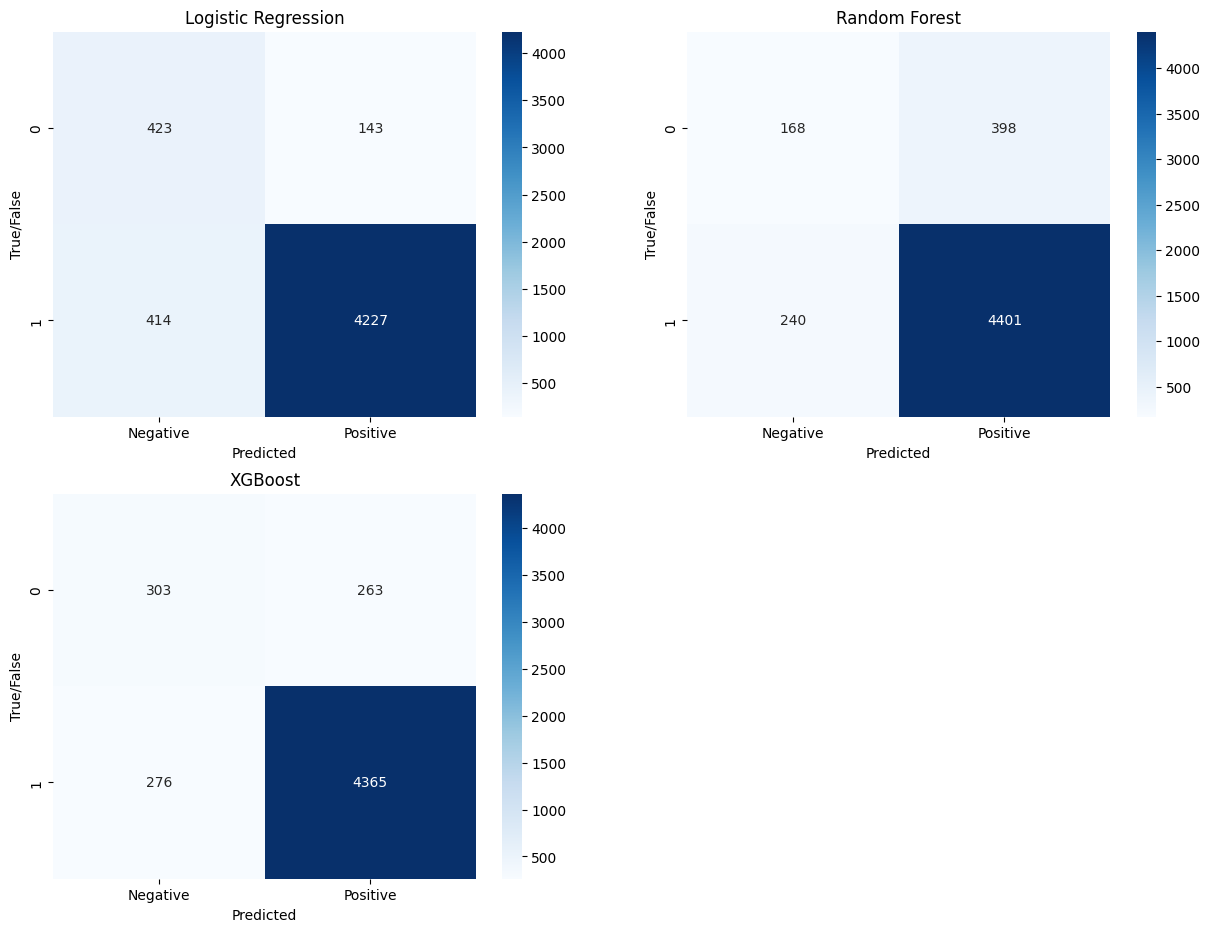

In [43]:
# Plotting confusion matrix for all models  
plt.figure(figsize=(15, 11))
for i, (name, model) in enumerate(models.items()):  
    plt.subplot(2, 2, i+1)  
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='Blues')  
    plt.title(name)  
    plt.xlabel('Predicted')  
    plt.ylabel('True/False')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])

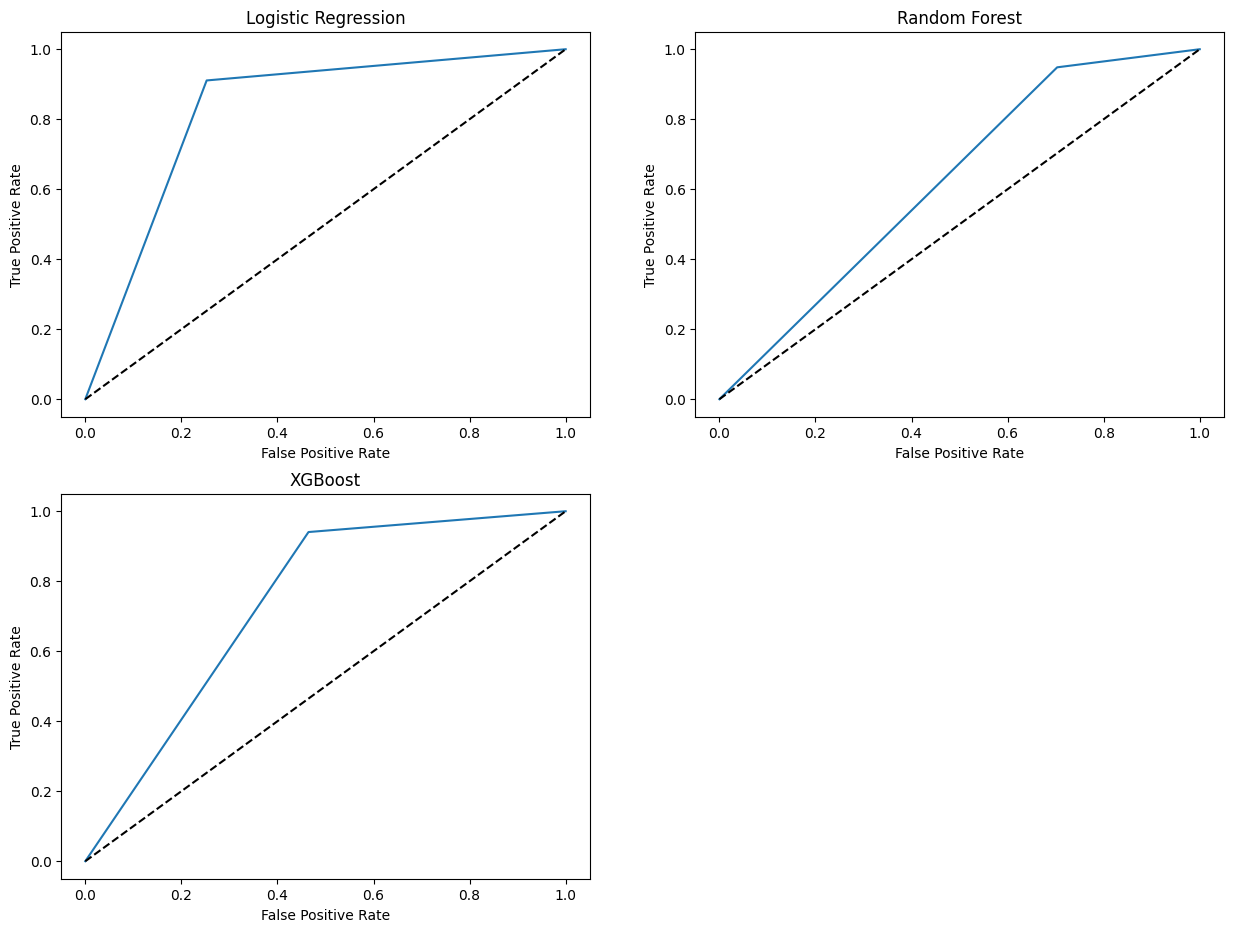

In [44]:
# Creating ROC/AUC curve represenattion fro three models
from sklearn.metrics import roc_curve, auc
# Function to plot ROC curve
plt.figure(figsize=(15, 11))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(2, 2, i+1)  
    fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
    roc_auc = auc(fpr, tpr)
    plt.title(name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')

### Choosing Logistic Regression Model as the preferred one due to folowing reasons
1. High Precision and Recall
2. Better ROC-AUC curve
3. Accuracy is only little bit low than random forest but random forest has poor ROC-AUC curve
4. F1 Score is highest among three models

## Step 7: Saving the Model

In [45]:
 # Save model  
joblib.dump(models['Logistic Regression'], 'best_model.pkl') 

# Save TF-IDF vectorizer, scaler, etc.  
joblib.dump(vect, 'tfidf_vectorizer.pkl')  
joblib.dump(scaler, 'num_scaler.pkl')

['num_scaler.pkl']

## Step 8 : Building Recomendation System

In [46]:

# Split the original product_reviews  
train_df, test_df = train_test_split(product_reviews, test_size=0.2, random_state=42)  
  
# Create user-item matrices for train and test  
user_item_train = train_df.pivot_table(index='reviews_username', columns='name', values='reviews_rating', aggfunc='mean')  
user_item_test = test_df.pivot_table(index='reviews_username', columns='name', values='reviews_rating', aggfunc='mean')  
  
user_item_train_clean = user_item_train.fillna(0)  
user_item_test_clean = user_item_test.fillna(0)  
  
# Subtract user means for Adjusted Cosine  
user_means = user_item_train_clean.replace(0,np.NaN).mean(axis=1)  
user_item_train_adj = user_item_train_clean.sub(user_means, axis=0).fillna(0)  

#### 1. Building User-User based Recomendation System ####

In [47]:
# Compute Adjusted Cosine Similarity  
def adjusted_cosine_similarity(user_item_matrix):  
    # Mean center (ignore zeros as missing ratings)  
    user_means = user_item_matrix.replace(0, np.nan).mean(axis=1)  
    user_item_centered = user_item_matrix.sub(user_means, axis=0).fillna(0)  
    # Compute cosine similarity  
    similarity_matrix = cosine_similarity(user_item_centered)  
    similarity_df = pd.DataFrame(  
        similarity_matrix,   
        index=user_item_matrix.index,   
        columns=user_item_matrix.index  
    )  
    return similarity_df, user_means 
  
user_similarity_df_train, user_means = adjusted_cosine_similarity(user_item_train_clean)
user_similarity_df_train = pd.DataFrame(  
    user_similarity_df_train,   
    index=user_item_train_clean.index,   
    columns=user_item_train_clean.index  
)  
  
# Prediction function using adjusted similarity  
def predict_user_rating(username, itemname, user_item_matrix, user_similarity_df, user_means):  
    if username not in user_item_matrix.index or itemname not in user_item_matrix.columns:  
        return np.nan  
    sim_scores = user_similarity_df[username].copy()  
    user_ratings = user_item_matrix[itemname]  
    relevant = user_ratings[user_ratings > 0]  
    if len(relevant) == 0:  
        return np.nan  
    sim_scores = sim_scores.drop(username, errors='ignore')  
    relevant = relevant.drop(username, errors='ignore')  
    sims = sim_scores[relevant.index]  
    means = user_means[relevant.index]  
    rating_devs = relevant - means  
    if sims.abs().sum() == 0:  
        return np.nan  
    pred = user_means[username] + np.dot(sims, rating_devs) / sims.abs().sum()  
    return pred

In [48]:
# Evaluate on test set  
actuals = []  
preds = [] 

for user in user_item_test_clean.index:  
    for item in user_item_test_clean.columns:  
        actual_rating = user_item_test_clean.loc[user, item]  
        if actual_rating > 0:  
            if user in user_item_train_clean.index and item in user_item_train_clean.columns:  
                pred_rating = predict_user_rating(  
                    user, item, user_item_train_clean, user_similarity_df_train, user_means  
                )  
                if not np.isnan(pred_rating):  
                    actuals.append(actual_rating)  
                    preds.append(pred_rating)  
  
# Calculate RMSE  
rmse_u = np.sqrt(mean_squared_error(actuals, preds))  
print(f"RMSE on the test set (Adjusted Cosine Similarity): {rmse_u:.4f}")

RMSE on the test set (Adjusted Cosine Similarity): 0.9714


In [49]:
def recommend_top_n_for_user(username, user_item_matrix, user_similarity_df, user_means, n=15):  
    """  
    Recommend top-N items for a username based on Adjusted Cosine Similarity CF.  
      
    Parameters:  
        username: The user to recommend for.  
        user_item_matrix: DataFrame of user-item ratings (training data, fillna(0)).  
        user_similarity_df: Precomputed user-user similarity DataFrame.  
        user_means: Series of user mean ratings from training set.  
        n: Number of recommendations to return (default=15).  
          
    Returns:  
        recommendations: DataFrame of top-N (item, predicted_rating) pairs, sorted by predicted_rating.  
    """  
    if username not in user_item_matrix.index:  
        print(f"Username '{username}' not found")  
        return pd.DataFrame(columns=['item', 'predicted_rating'])  
      
    # Items not yet rated by this user  
    user_ratings = user_item_matrix.loc[username]  
    unrated_items = user_ratings[user_ratings == 0].index  
      
    predictions = []  
    for item in unrated_items:  
        pred = predict_user_rating(username, item, user_item_matrix, user_similarity_df, user_means)  
        if not np.isnan(pred):  
            predictions.append((item, pred))  
      
    # Sort by predicted rating, descending  
    top_n = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]  
    recommendations = pd.DataFrame(top_n, columns=['item', 'predicted_rating'])  
    return recommendations

In [50]:
# Taking input user
input_user = input("Enter User Name For Recommendation: ")
if input_user not in product_reviews['reviews_username'].values:
    print(f"User '{input_user}' not found.")
else:
    user_recom = recommend_top_n_for_user(input_user,  user_item_train_clean,  user_similarity_df_train,  user_means,  n=15)  
    print("User Based Top 15 Recommendations:\n", pd.DataFrame(user_recom.item))

Username 'wonderwoman' not found
User Based Top 15 Recommendations:
 Empty DataFrame
Columns: [item]
Index: []


#### 2. Building Item-Item based Recomendation System ####

In [51]:
 #cdjusted Cosine Similarity for Items (Item-Item CF)  
  
def adjusted_cosine_similarity_items(user_item_matrix):  
    """  
    Compute adjusted cosine similarity for items using sklearn's cosine_similarity,  
    after mean-centering by user.  
    """  
    # Mean center: subtract user mean from each row (user)  
    user_means = user_item_matrix.replace(0, np.nan).mean(axis=1)  
    user_item_centered = user_item_matrix.sub(user_means, axis=0).fillna(0)  
    # Centering is done for users, but we're comparing items => transpose!  
    item_item_centered = user_item_centered.T  # Rows: items, Columns: users  
    # Compute cosine similarity between items  
    similarity_matrix = cosine_similarity(item_item_centered)  
    similarity_df = pd.DataFrame(similarity_matrix,   
                                index=item_item_centered.index,   
                                columns=item_item_centered.index)  
    return similarity_df, user_means  
  
item_similarity_df_train, user_means_train = adjusted_cosine_similarity_items(user_item_train)  
  
# 3. Predict a user's rating for an item using item-based collaborative filtering  
  
def predict_item_rating(username, itemname, user_item_matrix, item_similarity_df, user_means):  
    """  
    Predict a user's rating for a given item using item-based CF with adjusted cosine similarity.  
    """  
    # If the user or item isn't in the matrix, cannot predict  
    if username not in user_item_matrix.index or itemname not in user_item_matrix.columns:  
        return np.nan  
    # User's ratings on all items  
    user_ratings = user_item_matrix.loc[username]  
    # User's mean rating  
    user_mean = user_means.get(username, np.nan)  
    if np.isnan(user_mean):  
        return np.nan  
    # All items user has rated (excluding current)  
    rated = user_ratings[user_ratings > 0]  
    rated = rated.drop(itemname, errors='ignore')  
    if rated.empty:  
        return user_mean  # fallback to user's mean  
    # Similarities between target item and those rated  
    sims = item_similarity_df.loc[itemname, rated.index]  
    # Deviations from user mean for rated items  
    rating_devs = rated - user_mean  
    # Weighted sum for prediction (avoid zero sim sum)  
    denom = np.sum(np.abs(sims))  
    if denom == 0:  
        return user_mean  # fallback to user's mean if denominator is zero  
    pred = user_mean + np.dot(sims, rating_devs) / denom  
    return pred

In [52]:
def evaluate_rmse_itemcf(user_item_test_clean, user_item_train, item_similarity_df_train, user_means_train):  
    preds = []  
    actuals = []  
    # Iterate over all users and items in the test set
    for user in user_item_test_clean.index:
        for item in user_item_test_clean.columns:
            actual = user_item_test_clean.loc[user, item]
            if actual > 0:  # Only evaluate where there is a rating in the test set
                pred = predict_item_rating(user, item, user_item_train, item_similarity_df_train, user_means_train)
                if not np.isnan(pred):
                    preds.append(pred)
                    actuals.append(actual)
    rmse = np.sqrt(np.mean((np.array(actuals) - np.array(preds)) ** 2))
    return rmse
# Evaluate RMSE on test set
rmse_itemcf = evaluate_rmse_itemcf(user_item_test_clean, user_item_train_clean, item_similarity_df_train, user_means_train)
print(f"RMSE on the test set (Item-Based CF): {rmse_itemcf:.4f}")

RMSE on the test set (Item-Based CF): 1.0045


In [53]:
def recommend_top_n_for_user_itemcf(username, user_item_matrix, item_similarity_df, user_means, n=15, item_df=None):  
    """  
    Recommend top-N items for a user using item-based collaborative filtering.  
  
    Parameters:  
        username: The user's name.  
        user_item_matrix: User-item rating matrix.  
        item_similarity_df: Precomputed item-item similarity DataFrame.  
        user_means: Series of user mean ratings.  
        n: Number of recommendations to return.  
        item_df: Optional DataFrame with item information for enriching output.  
  
    Returns:  
        recommendations: DataFrame of top-N recommended items and predicted ratings.  
    """  
    if username not in user_item_matrix.index:  
        print(f"Username '{username}' not found in training data. Recommending popular items.")  
        # Recommend most popular items (by mean rating)  
        item_means = user_item_matrix.replace(0, np.nan).mean().sort_values(ascending=False)  
        recommendations = pd.DataFrame({'item': item_means.index[:n], 'predicted_rating': item_means.values[:n]})  
        if item_df is not None and 'item' in item_df.columns:  
            recommendations = recommendations.merge(item_df, how='left', left_on='item', right_on='item')  
        return recommendations  
  
    # Items not yet rated by this user  
    user_ratings = user_item_matrix.loc[username]  
    unrated_items = user_ratings[user_ratings == 0].index  
  
    predictions = []  
    for item in unrated_items:  
        pred = predict_item_rating(username, item, user_item_matrix, item_similarity_df, user_means)  
        if not np.isnan(pred):  
            predictions.append((item, pred))  
  
    # Sort recommendations  
    top_n = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]  
    recommendations = pd.DataFrame(top_n, columns=['item', 'predicted_rating'])  
    if item_df is not None and 'item' in item_df.columns:  
        recommendations = recommendations.merge(item_df, how='left', left_on='item', right_on='item')  
    return recommendations 

In [54]:
# Taking input user
input_user = input("Enter User Name For Recommendation: ")
if input_user not in product_reviews['reviews_username'].values:
    print(f"User '{input_user}' not found.")
else:
    user_recom = recommend_top_n_for_user_itemcf(input_user,  user_item_train_clean,  item_similarity_df_train,  user_means_train,  n=15)  
    print("Item Based Top 15 Recommendations:\n", pd.DataFrame(user_recom.item))

Username 'wonderwoman' not found in training data. Recommending popular items.
Item Based Top 15 Recommendations:
                                                  item
0   Tostitos Original Restaurant Style Tortilla Chips
1   Greyson Vintage Industrial Occasional Cocktail...
2                J.R. Watkins Hand Cream, Lemon Cream
3   The Seaweed Bath Co. Argan Conditioner, Smooth...
4              Simple Green All-Purpose Cleaner, 16oz
5                                       Heiress (dvd)
6   Head & Shoulders Dandruff Shampoo Ocean Lift 2...
7     Tramontina Ceramica 10 Piece Cookware Set - Red
8                Happy Tot Apple and Butternut Squash
9   Germ Guardian174 Elite 3-In-1 Pet Pure True He...
10                                     Clambake (dvd)
11     Fiskars174 Classic Stick Rotary Cutter (45 Mm)
12  Finish Gelpacs Dishwasher Detergent, Orange Sc...
13         Every Man Jack Pomade Signature Mint Scent
14   Various - Country's Greatest Gospel:Gold Ed (cd)


### Choosing User Based Collaborative filtering over the Item Based Collaborative filietring due to folowing reasons
1. Low RMSE Score for User Based Collaborative filtering

## Step 9: Making Recommendations for New User also enhancing the recommendations using Sentiment Analysis

In [55]:
# Load your trained sentiment analysis components  
best_model = joblib.load('best_model.pkl')  
vectorizer = joblib.load('tfidf_vectorizer.pkl') 
scaler= joblib.load('num_scaler.pkl')


# Getting Dummies before hand on categorical columns
full_cat_dummy_cols = pd.get_dummies(product_reviews[cat_cols],drop_first=True).columns.tolist()
# Saving the full dummy columns for future use
joblib.dump(full_cat_dummy_cols, 'full_cat_dummy_cols.pkl')

['full_cat_dummy_cols.pkl']

In [56]:
# Function to calculate adjusted cosine similarity for user-item matrix
def adjusted_cosine_similarity(user_item):  
    user_means = user_item.mean(axis=1)  
    centered = user_item.sub(user_means, axis=0).fillna(0)  
    sim_matrix = cosine_similarity(centered)  
    return pd.DataFrame(sim_matrix, index=user_item.index, columns=user_item.index) 

In [57]:
# Function to predict ratings for a user based on adjusted cosine similarity
def predict_ratings_for_user(user, user_item, user_similarity, k=10):  
    user_means = user_item.mean(axis=1)  
    items = user_item.columns  
    user_ratings = user_item.loc[user]  
    unrated_items = user_ratings[user_ratings.isnull()].index  
    predictions = {}  
    for item in unrated_items:  
        users_with_rating = user_item[item][user_item[item].notnull()].index  
        if len(users_with_rating) == 0:  
            continue  
        sims = user_similarity.loc[user, users_with_rating]  
        top_k_users = sims.abs().sort_values(ascending=False).head(k).index  
        top_k_sims = sims[top_k_users]  
        top_k_ratings = user_item.loc[top_k_users, item] - user_means.loc[top_k_users]  
        if top_k_sims.abs().sum() == 0:  
            continue  
        pred = (top_k_sims * top_k_ratings).sum() / top_k_sims.abs().sum()  
        pred += user_means.loc[user]  
        predictions[item] = pred  
    return predictions 

In [58]:
# Function to predict sentiment
def get_sentiment_scores_with_logreg(product_reviews, best_model, vectorizer, scaler, cat_cols, num_cols, full_cat_dummy_cols):  
    sentiment_dict = {}  
  
    # Preprocess all data first  
    product_reviews = product_reviews.copy()  
    product_reviews['clean_review'] = product_reviews['reviews_text'].apply(preprocess)  
    text_X = vectorizer.transform(product_reviews['clean_review'])  
  
    cat_X = pd.get_dummies(product_reviews[cat_cols])  
    cat_X = cat_X.reindex(columns=full_cat_dummy_cols, fill_value=0)  
  
    num_X = product_reviews[num_cols].copy()  
    num_X_scaled = scaler.transform(num_X)  
  
    grouped = product_reviews.groupby('name')  
    for item, group in grouped:  
        # Key: get positional indices, not label indices!  
        pos_idx = product_reviews.index.get_indexer(group.index)  
  
        text_X_group = text_X[pos_idx]  
        cat_X_group = cat_X.values[pos_idx, :]  
        num_X_group = num_X_scaled[pos_idx, :]  
  
        features = np.hstack([text_X_group.toarray(), cat_X_group, num_X_group])  
  
        preds = best_model.predict(features)  
        sentiment_score = np.mean(preds)  
        sentiment_dict[item] = sentiment_score  
  
    return sentiment_dict   

In [59]:
# Function to get final recomendations
def hybrid_recommendations(username, product_reviews, top_n=15, k=10, alpha=0.7):  
    user_item = product_reviews.pivot_table(index='reviews_username', columns='name', values='reviews_rating', aggfunc='mean')  
    if username not in user_item.index:  
        raise ValueError(f"Username '{username}' not found in data.")  
  
    user_sim = adjusted_cosine_similarity(user_item)  
    cf_predictions = predict_ratings_for_user(username, user_item, user_sim, k=k)  
    if not cf_predictions:  
        print("No predictions could be madef or this user (possibly all items already rated).")
        return pd.DataFrame()
    cf_pred_series = pd.Series(cf_predictions)  

    # Use the logistic regression-based sentiment scores   
    sentiment_scores = get_sentiment_scores_with_logreg(product_reviews, best_model, vectorizer, scaler, cat_cols, num_cols, full_cat_dummy_cols)  
    sentiment_series = pd.Series(sentiment_scores)  

    # Candidates: items the user hasn't rated  
    candidates = cf_pred_series.index  
    sentiment_for_candidates = sentiment_series.loc[candidates]  

    # Normalize both series (min-max scaling)  
    cf_norm = (cf_pred_series - cf_pred_series.min()) / (cf_pred_series.max() - cf_pred_series.min() + 1e-9)  
    sent_norm = (sentiment_for_candidates - sentiment_for_candidates.min()) / (sentiment_for_candidates.max() - sentiment_for_candidates.min() + 1e-9)  

    # Combine collaborative filtering and sentiment scores  
    hybrid_score = alpha * cf_norm + (1 - alpha) * sent_norm  

    # Top N recommendations  
    top_n_idx = hybrid_score.sort_values(ascending=False).head(top_n).index  

    # Prepare recommendation DataFrame  
    results = pd.DataFrame({  
        'PredictedRating': cf_pred_series.loc[top_n_idx],  
        'SentimentScore': sentiment_for_candidates.loc[top_n_idx],  
        'HybridScore': hybrid_score.loc[top_n_idx]  
    }).sort_values('HybridScore', ascending=False)  

    return results  

In [ ]:
# Taking input user
input_user = input("Enter User Name For Recommendation: ")
if input_user not in product_reviews['reviews_username'].values:
    print(f"User '{input_user}' not found.")
else:
    user_recom = hybrid_recommendations(input_user, product_reviews, top_n=15)
    print("Top 15 Recommendations:\n", pd.DataFrame(user_recom.index, columns=['Recommended Items']))

Top 15 Recommendations:
                                     Recommended Items
0   Arrid Extra Dry Anti-Perspirant Deodorant Spra...
1   Kind Dark Chocolate Chunk Gluten Free Granola ...
2   Olay Regenerist Deep Hydration Regenerating Cream
3            Leslie Sansone:Belly Blasting Walk (dvd)
4                   Tostitos Bite Size Tortilla Chips
5        Chex Muddy Buddies Brownie Supreme Snack Mix
6   Planes: Fire Rescue (2 Discs) (includes Digita...
7   Power Crunch Protein Energy Bar Peanut Butter ...
8   Pleasant Hearth Diamond Fireplace Screen - Esp...
9   Avery174 Ready Index Contemporary Table Of Con...
10                             Hormel Chili, No Beans
11    Bisquick Original Pancake And Baking Mix - 40oz
12  Coty Airspun Face Powder, Translucent Extra Co...
13  Godzilla 3d Includes Digital Copy Ultraviolet ...
14             All,bran Complete Wheat Flakes, 18 Oz.


In [29]:
product_reviews.to_csv('/Users/mhaider1/Downloads/Data Science/Gen AI/CAPSTONE/Product_Recommendation_App/product_reviews.csv', index=False)